# MODELO LDA
Proyecto: BNP Paribas Cardif Claims Management

Blanca Ubaque - 201725992		
Carolina Trespalacios - 200313688		
Santiago Barco - 200913781		
Rafael Niño - 200522388		

In [1]:
# Instalación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Para el desarrollo del modelo se tomarán los datos transformados en el ETL en los cuales se dejaron definidas las variables Dummies.

In [2]:
# Lectura de la data TRAIN
X_train = pd.read_csv('X_dtrain.csv', sep=',',na_values=[''],header=0)
y_train = pd.read_csv('y_dtrain.csv', sep=',',na_values=[''],header=0)
# Lectura de los datos TEST

X_test = pd.read_csv('X_dtest.csv', sep=',',na_values=[''],header=0)
y_test = pd.read_csv('y_dtest.csv', sep=',',na_values=[''],header=0)

Se procede a eliminar la variable 'Unnamed: 0' que fue utilizada en el ETL para la identificación de valores faltantes NAs

In [3]:
X_train.drop('Unnamed: 0', inplace=True, axis=1)
X_test.drop('Unnamed: 0', inplace=True, axis=1)
y_train.drop('Unnamed: 0', inplace=True, axis=1)
y_test.drop('Unnamed: 0', inplace=True, axis=1)

Se realizara la union de las bases de Train y Test debido a que se realizará una segunda validación por medio de CV

In [29]:
datad_X = pd.concat([X_train, X_test])
datad_y = pd.concat([y_train, y_test])
datad_y.head(2)
datad_y.describe()
X = datad_X 
y = datad_y

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Linear Discriminant Analysis

### Selección de Variables

Se partira del modelo de seleecion de variable corrido en el ETL - **Stepwise**

In [6]:
#Seleccionamos las variables con las que se trabajará el modelo
feature_cols = ['v50', 'v47_C', 'v66_C',
                'v110_B', 'v66_B', 'v14',
                'v66_A', 'v24_E', 'v79_O',
                'v119', 'v31_C', 'v24_C',
                'v79_J', 'v47_E', 'v79_D',
                'v47_D', 'v112_F', 'v74_C',
                'v79_A', 'v31_B']      
              
X_train2 = X_train[feature_cols]
X_test2 = X_test[feature_cols]

X_train = X_train[feature_cols]
X_test = X_test[feature_cols]

X_train2.shape

(45167, 20)

In [8]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
%matplotlib inline


In [9]:
y_train2 = y_train.values.ravel()

In [10]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train2, y_train2)
model = lda.fit(X_train2, y_train2)

/Users/santiagobarcogomez/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [11]:
#http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html#4.6.3-Linear-Discriminant-Analysis

#print(model.priors_)
#print(model.means_)
#print(model.coef_)

In [12]:
# make predictions for testing set
y_pred_class = lda.predict(X_test)
y_pred_class

array([1, 1, 1, ..., 1, 1, 1])

In [13]:
# predict probability
y_pred_prob = lda.predict_proba(X_test2)[:, 1]
y_pred_prob

array([ 0.71592821,  0.7217522 ,  0.77671228, ...,  0.70095779,
        0.62985667,  0.73510285])

In [14]:
print(np.unique(y_pred_class, return_counts=True))

(array([0, 1]), array([  536, 18822]))


### AUC SIMPLE

Luego del desarrollo del modelo se realizará el calculo de su rendimiento:

In [15]:
# calculate testing accuracy 
#If you use y_pred_class, it will interpret the zeros and ones as predicted probabilities of 0% and 100%
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.765884905465


In [16]:
# calculate AUC ESTE ES EL CORRECTO
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.714447341519


### CURVA ROC

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

Text(0,0.5,'True Positive Rate (Sensitivity)')

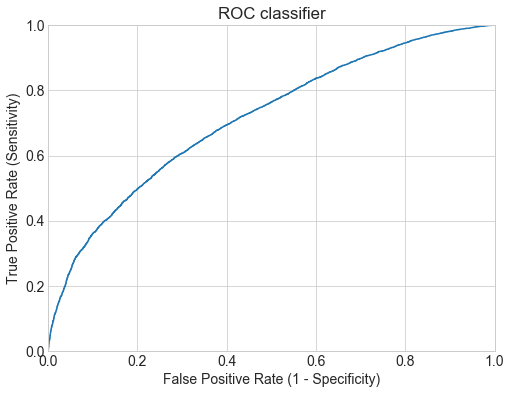

In [18]:
# plot ROC curve
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')


## MATRIZ DE CONFUSIÓN

In [19]:
    ### MATRIZ DE CONFUSIÓN
    #https://www.ritchieng.com/machine-learning-evaluate-classification-model/
        
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class)

array([[  355,  4351],
       [  181, 14471]])

In [20]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [21]:
evaluate_threshold(0.5)

Sensitivity: 0.987646737647
Specificity: 0.0754356141096


In [22]:
evaluate_threshold(0.3)

Sensitivity: 1.0
Specificity: 0.0


In [23]:
# calculate AUC
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.714447341519


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10739a198>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1073eb320>], dtype=object)

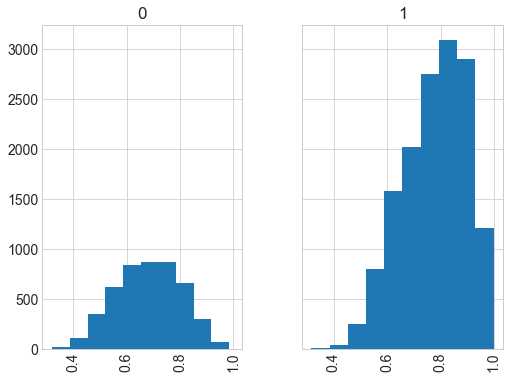

In [24]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame({'probability':y_pred_prob, 'target':y_test.values.ravel()})
df.hist(column='probability', by='target', sharex=True, sharey=True)

### F1 SCORE para TH 0.5

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred_class))
print('recall_score    ', recall_score(y_test, y_pred_class))

precision_score  0.76883434279
recall_score     0.987646737647


In [26]:
print('f1_score    ', f1_score(y_test, y_pred_class))

f1_score     0.864611340145


### CROSSVALIDATION DEL MODELO

Con el fin de determinar una medida de rendimiento mas aterrizada se aplicara CV al proceso de evaluación:

### Crosss Básico

In [27]:
from sklearn.cross_validation import train_test_split

/Users/santiagobarcogomez/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
res=[]
for i in range(20):
    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3*i)

    # train a logistic regression model
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
   
    # make predictions for testing set
    y_pred_class = lda.predict(X_test)
  
    # calculate testing accuracy
    res.append(metrics.accuracy_score(y_test, y_pred_class))

/Users/santiagobarcogomez/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/santiagobarcogomez/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [31]:
pd.Series(res).describe()

count    20.000000
mean      0.763861
std       0.002961
min       0.759422
25%       0.761793
50%       0.763080
75%       0.766411
max       0.769402
dtype: float64

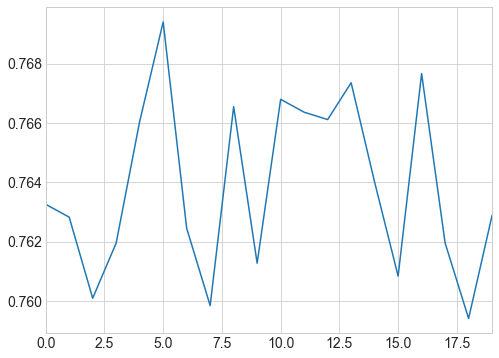

In [32]:
pd.Series(res).plot()

### Usando K folds

In [33]:
###+ USANDO K FOLDS

from sklearn.cross_validation import KFold

# Create k-folds
kf = KFold(X.shape[0], n_folds=20, random_state=0)

results = []
#resultsa = []
for train_index, test_index in kf:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train a logistic regression model
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)

    # make predictions for testing set
    y_pred_class = lda.predict(X_test)
    y_pred_prob = lda.predict_proba(X_test)[:, 1]

    # calculate testing accuracy
    results.append(metrics.accuracy_score(y_test, y_pred_class))
    #resultsa.append(metrics.accuracy_score(y_test, y_pred_prob))            
            

/Users/santiagobarcogomez/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/santiagobarcogomez/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


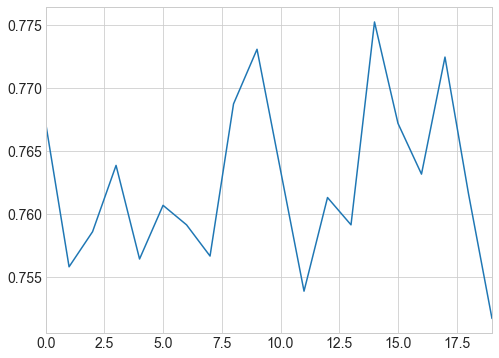

In [34]:
pd.Series(results).plot()

In [35]:
pd.Series(results).describe()

count    20.000000
mean      0.762480
std       0.006536
min       0.751705
25%       0.758116
50%       0.761469
75%       0.767222
max       0.775263
dtype: float64

### Usando Cross_Val_Score

In [36]:
from sklearn.cross_validation import cross_val_score
lda = LinearDiscriminantAnalysis()
results1 = cross_val_score(lda, X,  y.values.ravel(), cv=20, scoring='accuracy')

/Users/santiagobarcogomez/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/santiagobarcogomez/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/santiagobarcogomez/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/santiagobarcogomez/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/santiagobarcogomez/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/santiagobarcogomez/anaconda3/lib/python3.6/site-packages/sklearn/discrimi

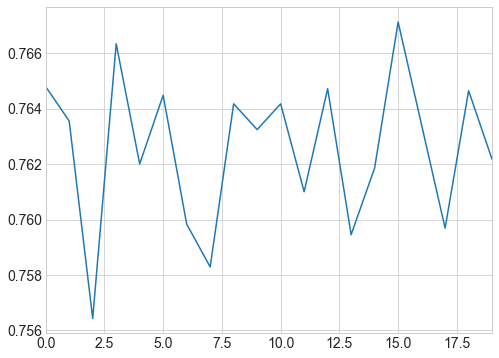

In [37]:
pd.Series(results1).plot()

In [38]:
pd.Series(results1).describe()

count    20.000000
mean      0.762573
std       0.002762
min       0.756430
25%       0.760713
50%       0.763329
75%       0.764528
max       0.767132
dtype: float64

### Gráfica de la predicción con TH 0 0.5

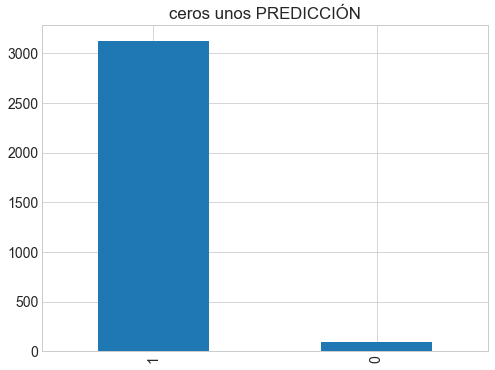

In [39]:
# GRAFICO DE LOS VALORES CLASS
p = pd.DataFrame({'Newtarget':y_pred_class,})
plot = p.Newtarget.value_counts().plot(kind='bar',title='ceros unos PREDICCIÓN')

### Gráfica de los valores de TEST

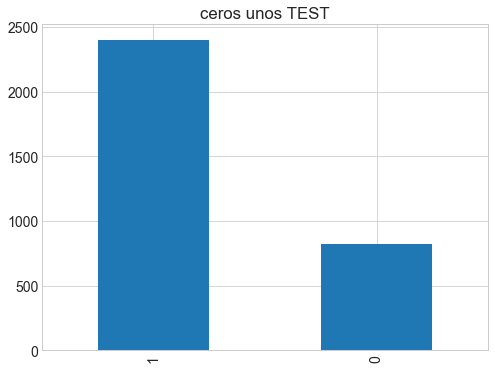

In [40]:
#f = pd.DataFrame({'Newtarget':y_pred_class,})
plot = y_test.target.value_counts().plot(kind='bar',title='ceros unos TEST')

Se uso LDA, ya que permite la reducción de la dimensionalidad de los datos, evitando el overfitting y reduciendo los costos computacionales, 

## CONCLUSIONES SOBRE TEST

In [41]:
print('AUC de la predicción 0 y 1        ', metrics.accuracy_score(y_test, y_pred_class))
print('AUC de la probabilidad            ', metrics.roc_auc_score(y_test, y_pred_prob))
print('AUC con Croosvalidation simple    ', pd.Series(res).mean())
print('AUC con K folds                   ', pd.Series(results).mean())
print('AUC con Cross_Val_Score           ', pd.Series(results1).mean())
print('F1_score  con TH 0.5              ', f1_score(y_test, y_pred_class))

#http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py

AUC de la predicción 0 y 1         0.751704897706
AUC de la probabilidad             0.720187146893
AUC con Croosvalidation simple     0.7638606496404663
AUC con K folds                    0.7624798204701458
AUC con Cross_Val_Score            0.7625727147868977
F1_score  con TH 0.5               0.855075085942


Text(0,0.5,'True Positive Rate (Sensitivity)')

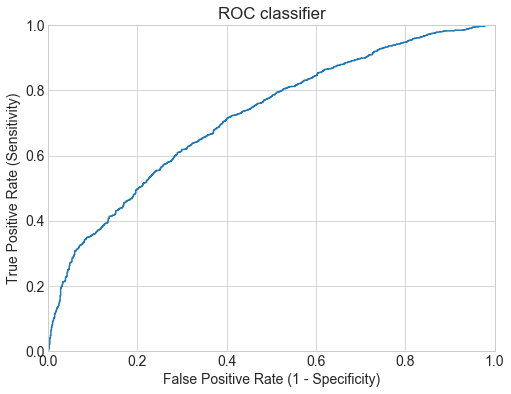

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [43]:
import seaborn as sns
#http://seaborn.pydata.org/
#sns.heatmap(autos.corr(), square=True, annot=True)
#https://about.sofia2.com/2017/09/13/analitica-de-datos-con-python-y-sofia2-24-graficos-de-relacion/